Part 1: Proof
= 

$$ \exp[-\frac{1}{2}((\sum_{i=1}^n \phi(x_i-\theta)^2)+ \tau(\theta-\theta_0)^2 ]$$

$$ = \exp[-\frac{1}{2}((\sum_{i=1}^n \phi({x_i}^2 - 2{x_i}\theta + {\theta}^2) + \tau({\theta}^2 - 2\theta{\theta_0} + {\theta_0}^2)) ]$$

$$ = \exp[-\frac{1}{2}(\phi \sum_{i=1}^n {x_i}^2 - 2\phi \theta \sum_{i=1}^n x_i + n \phi \theta^2 + \tau \theta^2 - 2 \tau \theta \theta_0 + \tau {\theta_0}^2) ]$$

$$ = \exp[-\frac{1}{2} (-2\theta (\phi \sum_{i=1}^n - \tau \theta_0 ) + \theta^2 (n \phi + \tau) + \tau {\theta_0}^2 + \phi \sum_{i=1}^n {x_i}^2] $$

$$ = \exp[-\frac{1}{2} (n \phi + \tau)(\theta^2 - \frac{-2\theta (\phi \sum_{i=1}^n - \tau \theta_0)}{n \phi + \tau} + \frac{\tau {\theta_0}^2 + \phi \sum_{i=1}^n {x_i}^2}{n \phi + \tau} ) ]$$

$$ \propto{} \exp(-\frac{1}{2} (\tau+n\phi)(\theta - \frac{1}{\tau+n\phi }(\tau\theta_0+\phi\sum_{i=1}^{n}x_{i}))^2 )$$

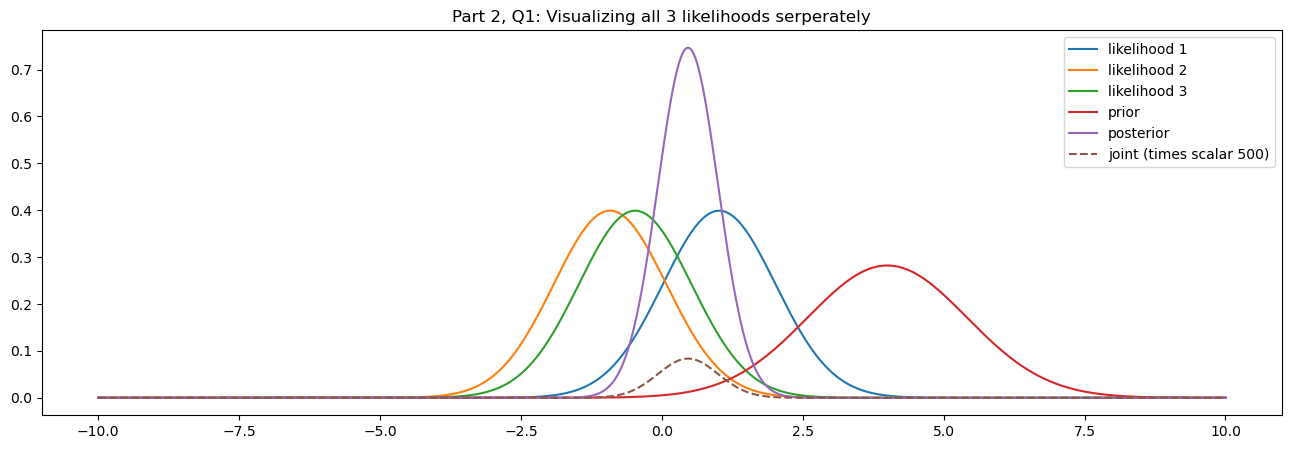

In [69]:
#Part 2, Question 1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood1 = stats.norm.pdf(x[0], loc = parameter_domain, scale = 1)
likelihood2 = stats.norm.pdf(x[1], loc = parameter_domain, scale = 1)
likelihood3 = stats.norm.pdf(x[2], loc = parameter_domain, scale = 1)
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, likelihood1, label="likelihood 1"); plt.plot(parameter_domain, likelihood2, label="likelihood 2") ; plt.plot(parameter_domain, likelihood3, label="likelihood 3") ; plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Part 2, Q1: Visualizing all 3 likelihoods serperately"); 

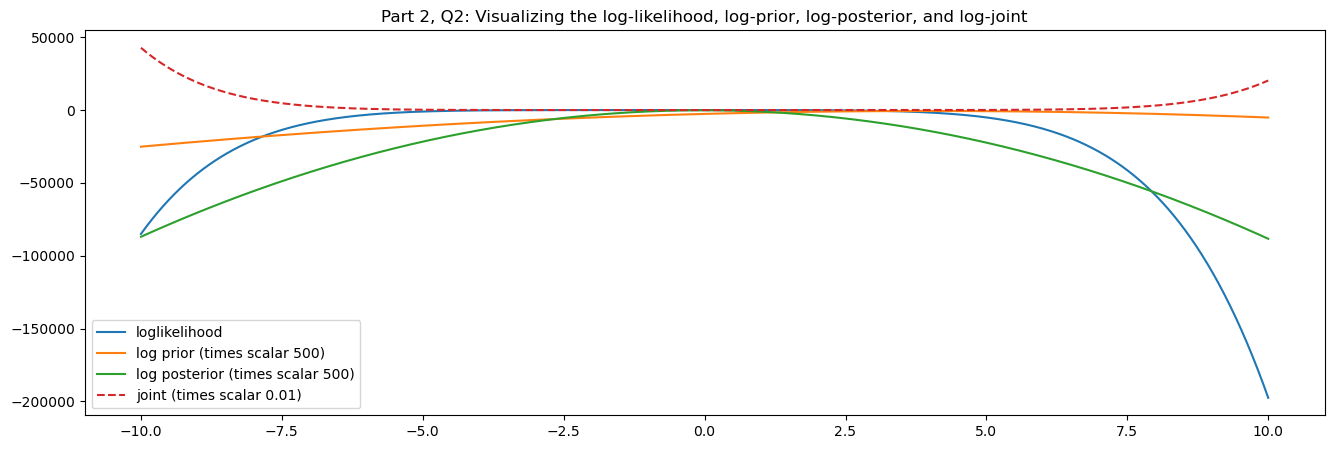

In [70]:
# Part 2, Question 2

n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?
c, c3 = 0.01, 500; 
joint = likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, likelihood, label="loglikelihood"); plt.plot(parameter_domain, c3*prior, label="log prior (times scalar "+str(c3)+")"); plt.plot(parameter_domain, c3*posterior, label="log posterior (times scalar "+str(c3)+")"); plt.plot(parameter_domain, c*joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Part 2, Q2: Visualizing the log-likelihood, log-prior, log-posterior, and log-joint"); 

Part 2, Question 3
= 

Take $p(\theta) \propto 1$ equal to a beta prior with $\alpha$ = 1 and $\beta$ = 1. Let c be the normalizing constant for a beta distribution. So, our posterior will be proportional to and will have the same distribution as:

(normal likelihood) $\times c \times y^{\alpha - 1} \times (1 - y)^{\beta - 1} $

 = (normal likelihood) $\times c \times y^{1 - 1} \times (1 - y)^{1 - 1} $
 
 = (normal likelihood) $\times c \times y^{0} \times (1 - y)^{0} $
 
 = (normal likelihood) $\times c \times 1 \times 1 $
 
 = (normal likelihood) $\times c $

So, the posterior will have a normal distribution with a new normalizing constant.

Part 2, Question 4
= 

Take the line at y = 4 from $-\infty$ to $\infty$ as the improper prior in question. This function will not integrate to 1 and is therefore an improper prior. 

If we multiply any likelihood function by that improper prior, the posterior will be the likelihood function stretched upwards by a factor of 4 (because every point on the likelihood function is multiplied by every point on the prior, and every point on the prior is equal to 4). In other words, the marginal likelihood on the posterior is 4 times larger than the normalizing constant on the likelihood function.